When exploring a large set of documents -- such as Wikipedia, news articles, StackOverflow, etc. -- it can be useful to get a list of related material. To find relevant documents you typically
* Decide on a notion of similarity
* Find the documents that are most similar

In the assignment you will
* Gain intuition for different notions of similarity and practice finding similar documents.
* Explore the tradeoffs with representing documents using raw word counts and TF-IDF
* Explore the behavior of different distance metrics by looking at the Wikipedia pages most similar to President Obama’s page.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
"""
Download datasets from local files (for Google Colab)
"""
from google.colab import files
uploaded = files.upload()
!ls

Saving people_wiki.csv to people_wiki.csv
people_wiki.csv  sample_data


## Load Wikipedia dataset

We will be using the dataset of abridged Wikipedia pages. Each element of the dataset consists of a link to the wikipedia article, the name of the person, and the text of the article (in lowercase).  

In [ ]:
wiki = pd.read_csv('people_wiki.csv')
wiki.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [ ]:
print(wiki.shape[0])

59071


**Note:** The dataset has 59071 articles.

If you want to check whether the text on the webpage agrees with the one here, you can display it with the following code:

In [ ]:
#from IPython.display import HTML
#print(wiki['text'][0])
#HTML(url=wiki['URI'][0])

## Ex. 1: Extract word count vectors

As we have seen in Assignment 4, we can extract word count vectors using `CountVectorizer` function.
- make sure you include words of unit length by using the parameter: `token_pattern=r"(?u)\b\w+\b"`
- do not use any stopwords
- take 10000 most frequent words in the corpus
- explicitly take all the words independent of in how many documents they occur
- obtain the matrix of word counts

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None, max_features=10000)
WCmatrix = vectorizer.fit_transform(wiki['text'])
print(WCmatrix)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8672421 stored elements and shape (59071, 10000)>
  Coords	Values
  (0, 1379)	1
  (0, 3)	1
  (0, 6372)	1
  (0, 117)	1
  (0, 4835)	1
  (0, 372)	4
  (0, 3796)	1
  (0, 1004)	3
  (0, 7901)	1
  (0, 3767)	1
  (0, 9798)	1
  (0, 6914)	3
  (0, 9860)	5
  (0, 9062)	27
  (0, 720)	4
  (0, 1676)	2
  (0, 4613)	13
  (0, 3766)	10
  (0, 5237)	4
  (0, 9775)	1
  (0, 1003)	1
  (0, 4385)	3
  (0, 3090)	1
  (0, 8145)	3
  (0, 3771)	4
  :	:
  (59070, 4585)	1
  (59070, 7534)	1
  (59070, 7536)	1
  (59070, 9037)	1
  (59070, 588)	1
  (59070, 2548)	1
  (59070, 9751)	1
  (59070, 8655)	1
  (59070, 8282)	1
  (59070, 6400)	1
  (59070, 1978)	3
  (59070, 563)	1
  (59070, 8627)	1
  (59070, 2544)	1
  (59070, 1534)	1
  (59070, 8822)	1
  (59070, 2352)	1
  (59070, 3264)	1
  (59070, 2634)	1
  (59070, 2341)	1
  (59070, 6890)	1
  (59070, 6602)	1
  (59070, 4762)	1
  (59070, 2740)	1
  (59070, 6007)	1


**Note:** Using `CountVectorizer`, the top 10,000 most frequent words from all articles in the wiki dataframe (`text` column) were extracted.  
The data is in the form of coordinates and values:  
* The first coordinate is the index of the article (0–59070),
* The second coordinate is the word index,
* The `value` column represents the number of occurrences of the word in the article.

## Ex. 2: Find nearest neighbors

**a)** Start by finding the nearest neighbors of the Barack Obama page using the above word count matrix to represent the articles and **Euclidean** distance to measure distance.
Save the distances in `wiki['BO-eucl']` and look at the top 10 nearest neighbors.

In [ ]:
# One can use the following:
    # from sklearn.neighbors import NearestNeighbors
    # nbrs = NearestNeighbors(n_neighbors=3, algorithm='brute',metric='euclidean').fit(X.toarray())
    # distances, indices = nbrs.kneighbors(X.toarray())
# but here let's use:
from sklearn.metrics import pairwise_distances


X = wiki[wiki["name"] == "Barack Obama"]["text"]
print(X)
X_vector = vectorizer.transform(X)
dist = pairwise_distances(X_vector, WCmatrix, metric="euclidean")
print(dist)
wiki['B0-eucl'] = dist[0]

wiki = wiki.sort_values(by="B0-eucl", axis=0, ascending=True)
print(wiki[:10])


35817    barack hussein obama ii brk husen bm born augu...
Name: text, dtype: object
[[46.30334761 59.53990259 54.65345369 ... 56.8770604  52.96225071
  50.99019514]]
                                                     URI  \
35817         <http://dbpedia.org/resource/Barack_Obama>   
24478            <http://dbpedia.org/resource/Joe_Biden>   
28447       <http://dbpedia.org/resource/George_W._Bush>   
48202         <http://dbpedia.org/resource/Tony_Vaccaro>   
14754          <http://dbpedia.org/resource/Mitt_Romney>   
31423       <http://dbpedia.org/resource/Walter_Mondale>   
36364           <http://dbpedia.org/resource/Don_Bonker>   
13229     <http://dbpedia.org/resource/Francisco_Barrio>   
35357     <http://dbpedia.org/resource/Lawrence_Summers>   
22745  <http://dbpedia.org/resource/Wynn_Normington_H...   

                             name  \
35817                Barack Obama   
24478                   Joe Biden   
28447              George W. Bush   
48202                Ton

**Note:** After using pairwise distances, the distance between the reference vector (in our case, the Barack Obama article) and all other articles was calculated. Sorting the table from the smallest distances (i.e., the closest neighbors), we can identify the top matches. The top 3 are: the Barack Obama article itself, the Joe Biden article, and the George W. Bush article.

**b)** Measure the pairwise distance between the Wikipedia pages of Barack Obama, George W. Bush, and Joe Biden. Which of the three pairs has the smallest distance?

In [ ]:
idxs = [35817, 24478, 28447]
names = ["Barack Obama", "Joe Biden", "George W. Bush"]
chosen_vec = WCmatrix[idxs]
chosen_dist = pairwise_distances(chosen_vec, chosen_vec, metric="euclidean")
print(f"Distance between {names[1]} and {names[0]} vectors: {chosen_dist[1][0]}")
print(f"Distance between {names[2]} and {names[1]} vectors: {chosen_dist[2][1]}")
print(f"Distance between {names[2]} and {names[0]} vectors: {chosen_dist[2][0]}")

Distance between Joe Biden and Barack Obama vectors: 31.352830813181765
Distance between George W. Bush and Joe Biden vectors: 30.919249667480614
Distance between George W. Bush and Barack Obama vectors: 33.66006535941367


**Note:** Among these three articles, the smallest distance is between the George W. Bush article and the Joe Biden article.

All of the 10 people from **a)** are politicians, but about half of them have rather tenuous connections with Obama, other than the fact that they are politicians, e.g.,

* Francisco Barrio is a Mexican politician, and a former governor of Chihuahua.
* Walter Mondale and Don Bonker are Democrats who made their career in late 1970s.

Nearest neighbors with raw word counts got some things right, showing all politicians in the query result, but missed finer and important details.

**c)** Let's find out why Francisco Barrio was considered a close neighbor of Obama.
To do this, look at the most frequently used words in each of Barack Obama and Francisco Barrio's pages.

In [ ]:
def top_words(name):
    """
    Get a table of the most frequent words in the given person's wikipedia page.
    """
    idx = wiki[wiki["name"] == name].index
    words_array = wiki[wiki.index == idx[0]]["text"].iloc[0].split()
    words = pd.DataFrame({"words": words_array})
    df = words['words'].value_counts().reset_index()
    df.columns = ['Word', 'Count']

    return df.sort_values(by='Count',ascending=False)

**Note:** The function finds the index of the person, then takes all the words from the article, splits them by spaces, and saves them into an array. It then counts the occurrences of each word and returns the result as a DataFrame.

In [ ]:
obama_words = top_words('Barack Obama')
obama_words

,Word,Count
0,the,40
1,in,30
2,and,21
3,of,18
4,to,14
...,...,...
252,sandy,1
253,related,1
254,policies,1
255,promoted,1


**Note:** As we can see, the top 3 words in Obama's article are "the", "in", and "and" — common words that are frequently used across articles and carry little specific meaning.

In [ ]:
barrio_words = top_words('Francisco Barrio')
barrio_words

,Word,Count
0,the,36
1,of,24
2,and,18
3,in,17
4,he,10
...,...,...
220,organizations,1
221,mexico,1
222,due,1
223,actions,1


**Note:** Similarly, for Barrio's top words, we see "the", "of", and "and" — again, common words that carry little meaningful information.

**d)** Extract the list of most frequent **common** words that appear in both Obama's and Barrio's documents and display the five words that appear most often in Barrio's article.

Use a dataframe operation known as **join**. The **join** operation is very useful when it comes to playing around with data: it lets you combine the content of two tables using a shared column (in this case, the index column of words). See [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) for more details.

In [ ]:
# Modify the code to avoid error.

common_words = obama_words.set_index('Word').join(barrio_words.set_index('Word'), rsuffix="_Barrio", how="inner")
common_words = common_words.reset_index()
common_words = common_words.rename(columns={"Count_Barrio": "count_Barrio", "Count": "count_Obama"})
common_words.sort_values(by='count_Barrio', ascending=False).head(5)

,Word,count_Obama,count_Barrio
0,the,40,36
3,of,18,24
2,and,21,18
1,in,30,17
7,he,7,10


**Note:** Above, the `join` function was used to combine only the words that appear in both articles (by setting the intersection). Then, the data was sorted by the number of occurrences in Barrio's article. The most frequent words in Barrio's article that are also common with Obama's article are "the", "of", and "and".


Collect all words that appear both in Barack Obama and George W. Bush pages.  Out of those words, find the 10 words that show up most often in Obama's page.

In [ ]:
bush_words = top_words('George W. Bush')

combined_words = obama_words.set_index('Word').join(bush_words.set_index('Word'), rsuffix="_Bush", how="inner")
combined_words = combined_words.reset_index()
combined_words = combined_words.rename(columns={"Count_Bush": "count_Bush", "Count": "count_Obama"})
combined_words = combined_words.fillna(0)
combined_words.sort_values(by='count_Obama', ascending=False).head(10)

,Word,count_Obama,count_Bush
0,the,40,39
1,in,30,22
2,and,21,14
3,of,18,14
4,to,14,11
5,his,11,6
6,act,8,3
7,a,7,6
8,he,7,8
9,as,6,6


**Note:** For words common to both Bush's and Obama's articles, sorted by their occurrences in Obama's article, the most frequent are "the", "in", and "and". At this stage, we keep seeing the non-meaningful (common) words.

**Note.** Even though common words are swamping out important subtle differences, commonalities in rarer political words still matter on the margin. This is why politicians are being listed in the query result instead of musicians, for example. In the next subsection, we will introduce a different metric that will place greater emphasis on those rarer words.

**e)** Among the words that appear in both Barack Obama and Francisco Barrio, take the 15 that appear most frequently in Obama. How many of the articles in the Wikipedia dataset contain all of those 15 words? Which are they?

In [ ]:
# It might be helpful to use:
word_to_ind={v: i for i, v in enumerate(vectorizer.get_feature_names_out())} # a dictionary with words as keys and indices as values
barrio_words = top_words('Francisco Barrio')

combined_words = obama_words.set_index('Word').join(barrio_words.set_index('Word'), rsuffix="_Barrio", how="inner")
combined_words = combined_words.reset_index()
combined_words = combined_words.rename(columns={"Count_Barrio": "count_Barrio", "Count": "count_Obama"})
combined_words = combined_words.fillna(0)
top15 = combined_words.sort_values(by='count_Obama', ascending=False).head(15)

top_words_list = [word for word in top15['Word'] if word in word_to_ind]
cols_indices = [word_to_ind[word] for word in top_words_list]
articles_subset = WCmatrix[:, cols_indices]
rows_all_words = [i for i, row in enumerate(articles_subset) if row.todense().all()]
print("Number of articles containing all 15 words:", len(rows_all_words))
for artice in rows_all_words:
    print(f"Name of person described in the article: {wiki['name'][artice]}")

Number of articles containing all 15 words: 30
Name of person described in the article: Donald Fowler
Name of person described in the article: Chris Redfern
Name of person described in the article: James Bilbray
Name of person described in the article: Paul Kagame
Name of person described in the article: Bernard Kenny
Name of person described in the article: Paul Sarlo
Name of person described in the article: Gy%C3%B6rgy Sur%C3%A1nyi
Name of person described in the article: Morley Winograd
Name of person described in the article: David Ibarra Mu%C3%B1oz
Name of person described in the article: Francisco Barrio
Name of person described in the article: Charles Taylor (Liberian politician)
Name of person described in the article: Jesse Ventura
Name of person described in the article: Joe Biden
Name of person described in the article: George W. Bush
Name of person described in the article: Arturo Vallarino
Name of person described in the article: John O. Agwunobi
Name of person described i

**Note:** There are 30 articles in the dataset (out of 59071) that contain all top 15 words from Obama's article that also appear in Barrio's article. Most (if not all) of the names displayed are the names of people that are polititians.

## Ex. 3: TF-IDF to the rescue

Much of the perceived commonalities between Obama and Barrio were due to occurrences of extremely frequent words, such as "the", "and", and "his". So nearest neighbors is recommending plausible results sometimes for the wrong reasons.

To retrieve articles that are more relevant, we should focus more on rare words that don't happen in every article. **TF-IDF** (term frequency–inverse document frequency) is a feature representation that penalizes words that are too common.

**a)** Repeat the search for the 10 nearest neighbors of Barack Obama with Euclidean distance of TF-IDF. This time do not limit to only 10000 most frequent words, but take all of them.

In [ ]:
wiki = pd.read_csv('people_wiki.csv')

In [ ]:
# We could use:
    # from sklearn.feature_extraction.text import TfidfVectorizer
# but since we already know how to compute CountVectorizer, let's use:
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer_all = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None)
WCmatrix_all = vectorizer_all.fit_transform(wiki["text"])

tfidf=TfidfTransformer(smooth_idf=False, norm=None)
TFIDFmatrix = tfidf.fit_transform(WCmatrix_all)

In [ ]:
# now recompute the distances as before but for TF-IDF
bo_idx = wiki[wiki['name'] == 'Barack Obama'].index[0]
dist = pairwise_distances(TFIDFmatrix[bo_idx], TFIDFmatrix)
wiki['BO-eucl-TF-IDF'] = dist[0]
wiki[['name', 'BO-eucl-TF-IDF']].sort_values(by='BO-eucl-TF-IDF').head(10)

,name,BO-eucl-TF-IDF
35817,Barack Obama,0.000000
38376,Samantha Power,139.364493
46811,Jeff Sessions,139.757740
7914,Phil Schiliro,139.812175
38714,Eric Stern (politician),140.450064
6507,Bob Menendez,141.661111
44681,Jesse Lee (politician),142.342440
6796,Eric Holder,142.490179
38495,Barney Frank,142.581337
56008,Nathan Cullen,142.751073


**Note:** As we can see, using TF-IDF Transformer and including more words changed the output. Now we can see different names, but they still belong to politicians.

In [ ]:
ps_idx = wiki[wiki['name'] == 'Phil Schiliro'].index[0]
print(f"Barack Obama vector: {TFIDFmatrix[bo_idx]}")
print(f"Phil Schiliro vector: {TFIDFmatrix[ps_idx]}")

Barack Obama vector: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 273 stored elements and shape (1, 548465)>
  Coords	Values
  (0, 3272)	5.9534091674263925
  (0, 8161)	4.320741957363495
  (0, 14809)	3.278681838200307
  (0, 16123)	3.1358344702080427
  (0, 16486)	3.1298344522079455
  (0, 18133)	6.884152423110731
  (0, 18416)	7.250296940830698
  (0, 20274)	8.071033082507702
  (0, 22240)	2.48804803508415
  (0, 23037)	2.509415721817156
  (0, 23792)	7.693309450812808
  (0, 24574)	5.185834427341408
  (0, 25315)	8.107041270312875
  (0, 26014)	2.7938099524877322
  (0, 26452)	11.986495389225194
  (0, 26654)	2.9545642372230505
  (0, 33789)	3.437803530749586
  (0, 34702)	8.074472383797048
  (0, 37531)	6.22130428644035
  (0, 39415)	3.7575177458668816
  (0, 41705)	7.039334291308083
  (0, 45084)	35.67822262297991
  (0, 46371)	5.8023464982877115
  (0, 46846)	4.295295291702331
  (0, 48242)	7.134465125305577
  :	:
  (0, 494571)	14.65722912754519
  (0, 496999)	4.27673852477103
  (0, 5001

**Note:** After taking a closer look at the vectors computed using TF-IDF, we can see that the values no longer represent the number of occurrences of words. Instead, they contain weights computed by the TF-IDF algorithm.


Let's determine whether this list makes sense.
* With a notable exception of Nathan Cullen, the other 8 are all American politicians who are contemporaries of Barack Obama.
* Phil Schiliro, Jesse Lee, Samantha Power, Eric Stern, Eric Holder worked for Obama.

Clearly, the results are more plausible with the use of TF-IDF. Let's take a look at the word vector for Obama and Schilirio's pages. Notice that TF-IDF representation assigns a weight to each word. This weight captures relative importance of that word in the document.

**b)** Sort the words in Obama's article by their TF-IDF weights; do the same for Schiliro's article as well.
Using the **join** operation we learned earlier, compute the common words shared by Obama's and Schiliro's articles.
Sort the common words by their TF-IDF weights in Obama's document.

In [ ]:
def top_words_tf_idf(name):
    """
    Get a table of the largest tf-idf words in the given person's wikipedia page.
    """
    idx = wiki[wiki['name'] == name].index[0]
    vec = TFIDFmatrix[idx]

    inds = vec.indices
    vals = vec.data
    words = vectorizer.get_feature_names_out()[inds]
    df = pd.DataFrame({
        "words": words,
        "tf-idf": vals
    })

    return df.sort_values(by='tf-idf',ascending=False)

In [ ]:
obama_tf_idf = top_words_tf_idf('Barack Obama')
schiliro_tf_idf = top_words_tf_idf('Phil Schiliro')
common_words = obama_tf_idf.set_index('words').join(schiliro_tf_idf.set_index('words'), rsuffix="_Schiliro", how="inner")
common_words = common_words.reset_index()
common_words = common_words.rename(columns={"tf-idf": "tf-idf_Obama"})
print(common_words.sort_values(by='tf-idf_Obama', ascending=False))

             words  tf-idf_Obama  tf-idf_Schiliro
0            obama     52.295653        11.621256
1              the     40.004063        10.001016
2               in     30.028962         5.004827
3              and     21.015648         6.004471
4              law     20.722936        10.361468
5               of     18.074811         9.037406
6       democratic     16.410689         8.205344
7               to     14.657229         7.328615
8              his     13.888726         1.262611
9           senate     13.164288         4.388096
10       president     11.226869        14.033587
11    presidential      9.386955         4.693478
12              he      8.493580        13.347054
13          states      8.473201         2.824400
14            2011      8.107041         5.404694
15          policy      8.095386         4.047693
16            2004      8.071033         2.690344
17          united      7.703766         2.567922
18            2009      7.693309         2.564436


**Note:** As we can see, using TF-IDF changed the order of the words. Now, the most common shared word in Obama's article is "Obama". While we still see common words like "or" and "of", we also see more meaningful words such as "democratic", "president", and "law".


**c)** Among the words that appear in both Barack Obama and Phil Schiliro, take the 15 that have largest weights in Obama. How many of the articles in the Wikipedia dataset contain all of those 15 words? Which are they?

In [ ]:
# It might be helpful to use:
word_to_ind={v: i for i, v in enumerate(vectorizer.get_feature_names_out())} # a dictionary with words as keys and indices as values

top15 = common_words.sort_values(by='tf-idf_Obama', ascending=False).head(15)

top_words_list = [word for word in top15['words'] if word in word_to_ind]
cols_indices = [word_to_ind[word] for word in top_words_list]
articles_subset = TFIDFmatrix[:, cols_indices]
rows_all_words = [i for i, row in enumerate(articles_subset) if row.todense().all()]
print("Number of articles containing all 15 words:", len(rows_all_words))
for artice in rows_all_words:
    print(f"Name of person described in the article: {wiki['name'][artice]}")


Number of articles containing all 15 words: 3
Name of person described in the article: Phil Schiliro
Name of person described in the article: Joe Biden
Name of person described in the article: Barack Obama


**Note:** Out of all wiki articles, only 3 — the Schiliro's article and Obama's article themselves, plus Biden's article — contain the top 15 common words.


Notice the huge difference in this calculation using TF-IDF scores instead  of raw word counts. We've eliminated noise arising from extremely common words.

## Ex. 4: Choosing metrics

**a)** Compute the Euclidean distance between TF-IDF features of Obama and Biden.

In [ ]:
names=["Barack Obama", "Joe Biden"]
dist = pairwise_distances(TFIDFmatrix[wiki[(wiki.name == "Barack Obama") | (wiki.name == "Joe Biden")].index])
print(f"Distance between {names[0]} and {names[1]} vectors: {dist[0][1]}")

Distance between Barack Obama and Joe Biden vectors: 148.77845413077898


**Note:** Again, we checked the distance between two vectors, but now the vectors have been transformed using TF-IDF.

The distance is larger than the distances we found for the 10 nearest neighbors, which we repeat here for readability:

In [ ]:
wiki.sort_values(by='BO-eucl-TF-IDF',ascending=True)[['name','BO-eucl-TF-IDF']][0:10]

,name,BO-eucl-TF-IDF
35817,Barack Obama,0.000000
38376,Samantha Power,139.364493
46811,Jeff Sessions,139.757740
7914,Phil Schiliro,139.812175
38714,Eric Stern (politician),140.450064
6507,Bob Menendez,141.661111
44681,Jesse Lee (politician),142.342440
6796,Eric Holder,142.490179
38495,Barney Frank,142.581337
56008,Nathan Cullen,142.751073


But one may wonder, is Biden's article that different from Obama's, more so than, say, Schiliro's? It turns out that, when we compute nearest neighbors using the Euclidean distances, we unwittingly favor short articles over long ones.

**b)** Let us compute the length of each Wikipedia document, and examine the document lengths for the 100 nearest neighbors to Obama's page. To compute text length use the same splitting rules you used in `vectorizer`.

In [ ]:
tokenizer = lambda text: text.split()

def compute_length(row):
# Here we could use simply:
#     return len(row['text'].split(' '))
    return len(tokenizer(row['text']))

wiki['length'] = wiki.apply(compute_length, axis=1)

In [ ]:
nearest_neighbors_euclidean = wiki.sort_values(by='BO-eucl-TF-IDF',ascending=True)[:100]
print(nearest_neighbors_euclidean)

                                                     URI  \
35817         <http://dbpedia.org/resource/Barack_Obama>   
38376       <http://dbpedia.org/resource/Samantha_Power>   
46811        <http://dbpedia.org/resource/Jeff_Sessions>   
7914         <http://dbpedia.org/resource/Phil_Schiliro>   
38714  <http://dbpedia.org/resource/Eric_Stern_(polit...   
...                                                  ...   
12834  <http://dbpedia.org/resource/Mark_Waller_(judge)>   
11303      <http://dbpedia.org/resource/Steven_Weinberg>   
8277      <http://dbpedia.org/resource/John_M._Facciola>   
11996    <http://dbpedia.org/resource/Thomas_H._Jackson>   
50366  <http://dbpedia.org/resource/Patrick_Lipton_Ro...   

                          name  \
35817             Barack Obama   
38376           Samantha Power   
46811            Jeff Sessions   
7914             Phil Schiliro   
38714  Eric Stern (politician)   
...                        ...   
12834      Mark Waller (judge)   
11303  

**Note:** The first few and last few of the top 100 most similar articles to Obama, computed using Euclidean distance (with TF-IDF), have lengths around 200–300 words (excluding the first article, which is Obama's article itself, with 540 words).

**c)** To see how these document lengths compare to the lengths of other documents in the corpus, make a histogram of the document lengths of Obama's 100 nearest neighbors and compare to a histogram of document lengths for all documents.

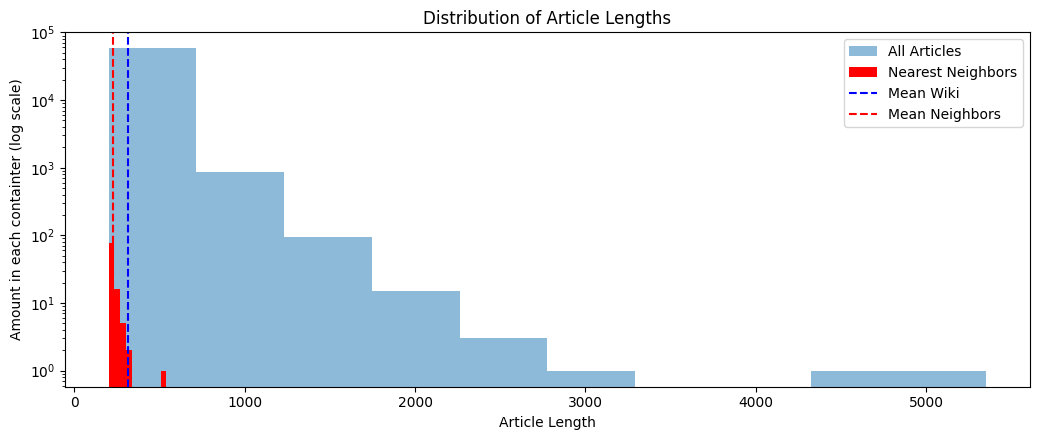

In [ ]:
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], alpha=0.5, label='All Articles')
plt.hist(nearest_neighbors_euclidean['length'], color='red', label='Nearest Neighbors')
mean_wiki = wiki['length'].mean()
mean_nearest = nearest_neighbors_euclidean['length'].mean()
plt.axvline(mean_wiki, color='blue', linestyle='--', label='Mean Wiki')
plt.axvline(mean_nearest, color='red', linestyle='--', label='Mean Neighbors')
plt.yscale('log')
plt.xlabel('Article Length')
plt.ylabel('Amount in each containter (log scale)')
plt.title('Distribution of Article Lengths')
plt.legend()
plt.tight_layout()
plt.show()

**Note:** As we can see, the articles that were previously chosen appear at the start of the x-axis, meaning they are among the shortest articles in the entire Wiki dataset.

Relative to the rest of Wikipedia, nearest neighbors of Obama are overwhemingly short, most of them being shorter than 300 words. The bias towards short articles is not appropriate in this application as there is really no reason to  favor short articles over long articles (they are all Wikipedia articles, after all). Many of the Wikipedia articles are 300 words or more, and both Obama and Biden are over 300 words long.

**Note**: For the interest of computation time, the dataset given here contains _excerpts_ of the articles rather than full text. For instance, the actual Wikipedia article about Obama is around 25000 words. Do not be surprised by the low numbers shown in the histogram.

**Note:** Both word-count features and TF-IDF are proportional to word frequencies. While TF-IDF penalizes very common words, longer articles tend to have longer TF-IDF vectors simply because they have more words in them.

To remove this bias, we turn to **cosine distances**:
$$
d(\mathbf{x},\mathbf{y}) = 1 - \frac{\mathbf{x}^T\mathbf{y}}{\|\mathbf{x}\| \|\mathbf{y}\|}
$$
Cosine distances let us compare word distributions of two articles of varying lengths.

**d)** Train a new nearest neighbor model, this time with cosine distances.  Then repeat the search for Obama's 100 nearest neighbors and make a plot to better visualize the effect of having used cosine distance in place of Euclidean on our TF-IDF vectors.

In [ ]:
cosine_dist = pairwise_distances(TFIDFmatrix[bo_idx], TFIDFmatrix, metric="cosine")
wiki["BO-cosine-TF-IDF"] = cosine_dist[0]
nearest_neighbors_cosine = wiki.sort_values(by='BO-cosine-TF-IDF', ascending=True)[:100]
nearest_neighbors_cosine

,URI,name,text,BO-eucl-TF-IDF,length,BO-cosine-TF-IDF
35817,<http://dbpedia.org/resource/Barack_Obama>,Barack Obama,barack hussein obama ii brk husen bm born augu...,0.000000,540,1.110223e-15
24478,<http://dbpedia.org/resource/Joe_Biden>,Joe Biden,joseph robinette joe biden jr dosf rbnt badn b...,148.778454,414,5.727248e-01
57108,<http://dbpedia.org/resource/Hillary_Rodham_Cl...,Hillary Rodham Clinton,hillary diane rodham clinton hlri dan rdm klnt...,167.515131,580,6.161487e-01
38376,<http://dbpedia.org/resource/Samantha_Power>,Samantha Power,samantha power born september 21 1970 is an ir...,139.364493,310,6.257966e-01
38714,<http://dbpedia.org/resource/Eric_Stern_(polit...,Eric Stern (politician),eric stern is the director of operations for t...,140.450064,255,6.514751e-01
...,...,...,...,...,...,...
2045,<http://dbpedia.org/resource/Allan_Ryan_(attor...,Allan Ryan (attorney),allan a ryan jr is an american attorney author...,149.144586,291,7.313755e-01
47085,<http://dbpedia.org/resource/Ray_Thornton>,Ray Thornton,raymond hoyt ray thornton jr born july 16 1928...,155.981962,326,7.319076e-01
16392,<http://dbpedia.org/resource/P%C3%A9ter_Kov%C3...,P%C3%A9ter Kov%C3%A1cs (lawyer),pter kovcs was born in 1959 szeged hungary he ...,155.688822,365,7.321718e-01
55495,<http://dbpedia.org/resource/Lokman_Singh_Karki>,Lokman Singh Karki,lokman singh karki nepali about this sound lis...,483.738587,2486,7.326076e-01


**Note:** After applying cosine distance instead of Euclidean distance, we can see articles with larger lengths — one even reached 2,486 words. Using cosine distance effectively eliminates the bias toward shorter articles.

From a glance at the above table, things look better.  For example, we now see Joe Biden as Barack Obama's nearest neighbor!  We also see Hillary Clinton on the list.  This list looks even more plausible as nearest neighbors of Barack Obama.

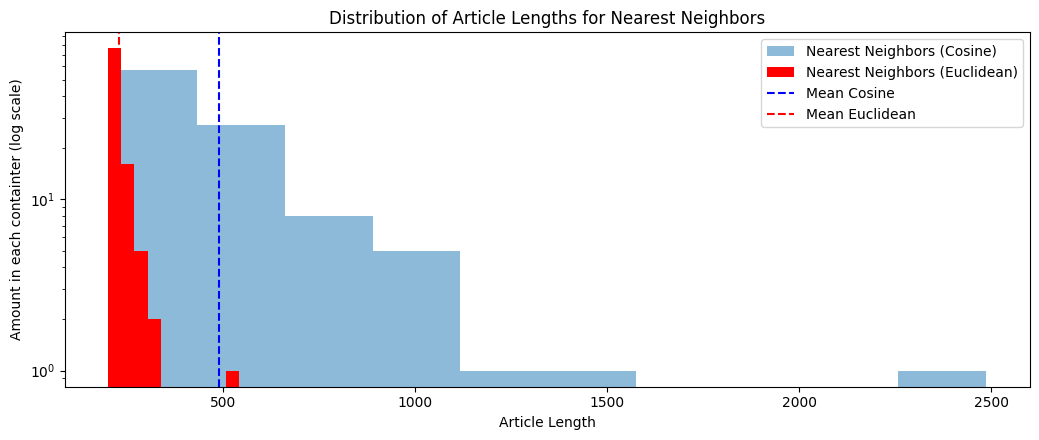

In [ ]:
plt.figure(figsize=(10.5,4.5))
plt.hist(nearest_neighbors_cosine['length'], alpha=0.5, label='Nearest Neighbors (Cosine)')
plt.hist(nearest_neighbors_euclidean['length'], color='red', label='Nearest Neighbors (Euclidean)')
mean_cosine = nearest_neighbors_cosine['length'].mean()
mean_euclidean = nearest_neighbors_euclidean['length'].mean()
plt.axvline(mean_cosine, color='blue', linestyle='--', label='Mean Cosine')
plt.axvline(mean_euclidean, color='red', linestyle='--', label='Mean Euclidean')
plt.yscale('log')
plt.xlabel('Article Length')
plt.ylabel('Amount in each containter (log scale)')
plt.title('Distribution of Article Lengths for Nearest Neighbors')
plt.legend()
plt.tight_layout()
plt.show()

**Note:** As expected, the neighbors chosen using cosine distance are much more spread out along the x-axis compared to those calculated using Euclidean distance.

Indeed, the 100 nearest neighbors using cosine distance provide a sampling across the range of document lengths, rather than just short articles like Euclidean distance provided.

**Moral of the story**: In deciding the features and distance measures, check if they produce results that make sense for your particular application.

## Ex. 5: Problem with cosine distances: tweets vs. long articles

Happily ever after? Not so fast. Cosine distances ignore all document lengths, which may be great in certain situations but not in others. For instance, consider the following (admittedly contrived) example.

```
+--------------------------------------------------------+
|                                             +--------+ |
|  One that shall not be named                | Follow | |
|  @username                                  +--------+ |
|                                                        |
|  Democratic governments control law in response to     |
|  popular act.                                          |
|                                                        |
|  8:05 AM - 16 May 2016                                 |
|                                                        |
|  Reply   Retweet (1,332)   Like (300)                  |
|                                                        |
+--------------------------------------------------------+
```

**a)** Transform the tweet into TF-IDF features, using the fit to the Wikipedia dataset. (That is, let's treat this tweet as an article in our Wikipedia dataset and see what happens.) How similar is this tweet to Barack Obama's Wikipedia article?

In [ ]:
df = pd.DataFrame({'text': ['democratic governments control law in response to popular act']})

tweet_vec = tfidf.transform(vectorizer.transform(df['text']))


def top_words_tf_idf(vec, vectorizer=vectorizer):
    inds = vec.indices
    vals = vec.data
    words = vectorizer.get_feature_names_out()[inds]
    return pd.DataFrame({"tf_idf": vals}, index=words).sort_values(by="tf_idf", ascending=False)

top_words_tf_idf(tweet_vec)

,tf_idf
response,5.261462
governments,5.167571
control,4.721765
act,4.459778
democratic,4.102672
popular,3.764479
law,3.453823
to,1.046945
in,1.000965


Let's compare this tweet's TF-IDF vectors  to Barack Obama's Wikipedia entry.

In [ ]:
obama_tf_idf

,words,tf-idf
163,obama,52.295653
245,the,40.004063
21,act,35.678223
118,in,30.028962
126,iraq,21.747379
...,...,...
127,is,2.055233
155,new,1.887235
266,which,1.767431
244,that,1.661407


**b)** Now, compute the cosine distance between the Barack Obama article and this tweet:

In [ ]:
from sklearn.metrics.pairwise import cosine_distances # for one pair of samples we can just use this function

print(cosine_distances(TFIDFmatrix[bo_idx], tweet_vec))

[[0.69866453]]


**Note:** Based on the cosine distance (around 0.7), the tweet and article are quite dissimilar (cosine distance ranges from 0 to 1, where 0 means the vectors are identical and 1 means they are completely dissimilar). This is likely because the article contains many words that are not present in the tweet, due to the lengths of both.

Let's compare this distance to the distance between the Barack Obama article and all of its Wikipedia nearest neighbors:

In [ ]:
nearest_neighbors_cosine[0:23]

,URI,name,text,BO-eucl-TF-IDF,length,BO-cosine-TF-IDF
35817,<http://dbpedia.org/resource/Barack_Obama>,Barack Obama,barack hussein obama ii brk husen bm born augu...,0.000000,540,1.110223e-15
24478,<http://dbpedia.org/resource/Joe_Biden>,Joe Biden,joseph robinette joe biden jr dosf rbnt badn b...,148.778454,414,5.727248e-01
57108,<http://dbpedia.org/resource/Hillary_Rodham_Cl...,Hillary Rodham Clinton,hillary diane rodham clinton hlri dan rdm klnt...,167.515131,580,6.161487e-01
38376,<http://dbpedia.org/resource/Samantha_Power>,Samantha Power,samantha power born september 21 1970 is an ir...,139.364493,310,6.257966e-01
38714,<http://dbpedia.org/resource/Eric_Stern_(polit...,Eric Stern (politician),eric stern is the director of operations for t...,140.450064,255,6.514751e-01
28447,<http://dbpedia.org/resource/George_W._Bush>,George W. Bush,george walker bush born july 6 1946 is an amer...,158.992210,505,6.594783e-01
39357,<http://dbpedia.org/resource/John_McCain>,John McCain,john sidney mccain iii born august 29 1936 is ...,148.246627,410,6.616452e-01
48693,<http://dbpedia.org/resource/Artur_Davis>,Artur Davis,artur genestre davis born october 9 1967 is an...,151.195103,371,6.666905e-01
18827,<http://dbpedia.org/resource/Henry_Waxman>,Henry Waxman,henry arnold waxman born september 12 1939 is ...,145.288309,279,6.712258e-01
37199,<http://dbpedia.org/resource/Barry_Sullivan_(l...,Barry Sullivan (lawyer),barry sullivan is a chicago lawyer and as of j...,231.698862,893,6.732998e-01


**Note:** Quite surprisingly, aside from the first few articles, the rest have similar or bigger distances to Obama's article, than the tweet.

With cosine distances, the tweet is "nearer" to Barack Obama than most people! If someone is reading the Barack Obama Wikipedia page, would you want to recommend they read this tweet?
In practice, it is common to enforce maximum or minimum document lengths. After all, when someone is reading a long article from _The Atlantic_, you wouldn't recommend him/her a tweet.